In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## 便座

### 時刻別消費電力量
$$
E_{ Elc, toilet-seat-heater, d, t } =  P_{ Elc, toilet-seat-heater } \times t_{ toilet-seat-heater, d, t } \times 10^{ -3 }
$$

$ E_{ Elc, toilet-seat-heater, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ P_{ Elc, toilet-seat-heater } $：便座暖房時の消費電力,W  
$ t_{ toilet-seat-heater, d, t } $：日付dの時刻tにおける便座暖房時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_toilet_seat_heater_d_t(theta_ave_d, P_Elc_toilet_seat_heater_rtd, t_toilet_seat_heater_d_t):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    theta_ave_d : float
        日付dにおける平均外気温度（地域、季節によらず　11.23）, ℃

    P_Elc_toilet_seat_heater_rtd : float
        便座暖房時の定格消費電力, W
        
    t_toilet_seat_heater_d_t : ndarray(N-dimensional array)
        1年間の全時間の暖房時間を格納したND配列, h
        d日t時の暖房時間が年開始時から8760個連続して格納されている
    
    Returns
    ----------
    E_Elc_toilet_seat_heater_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    P_Elc_toilet_seat_heater = get_P_Elc_toilet_seat_heater(theta_ave_d, P_Elc_toilet_seat_heater_rtd)
    
    E_Elc_toilet_seat_heater_d_t = P_Elc_toilet_seat_heater * t_toilet_seat_heater_d_t
    E_Elc_toilet_seat_heater_d_t = E_Elc_toilet_seat_heater_d_t * 10**(-3)
    
    return E_Elc_toilet_seat_heater_d_t

### 動作別の消費電力

#### 暖房時の消費電力  
$$
P_{ Elc, toilet-seat-heater } = \frac{ E_{ Elc, toilet-seat-heater, d } }{ 24 \times 1 }　
$$
$$
E_{ Elc, toilet-seat-heater, d } = -20.01 \times \theta_{ toilet, ave, d } + 922.4 \times \frac{ P_{ Elc, toilet-seat-heater, rtd } }{ 45 }
$$
$$
\theta_{ toilet, ave, d } = 0.4984 \times \theta_{ oa, ave, d } + 13.427
$$

$ E_{ Elc, toilet-seat-heater, d } $：日付dにおける便座暖房の消費電力量,Wh  
$ \theta_{ toilet, ave, d } $：日付dにおける便所の平均温度,℃  
$ P_{ Elc, toilet-seat-heater, rtd } $：便座暖房の定格消費電力,W  
$ \theta_{ oa, ave, d } $:日付dにおける平均外気温度（ 地域、季節に依らず 11.23）,℃  
$ 24 $ ：24時間（日積算電力量を時刻別電力量にに換算するための数値）,時/日  
$ 1 $：1時間（消費電力量を消費電力に換算するための数値）,h

In [3]:
def get_P_Elc_toilet_seat_heater(theta_ave_d, P_Elc_toilet_seat_heater_rtd):
    """暖房時の消費電力を計算する
    
    Parameters
    ----------
    theta_ave_d : float
        日付dにおける平均外気温度（地域、季節によらず　11.23）, ℃

    P_Elc_toilet_seat_heater_rtd : float
        便座暖房時の定格消費電力, W
        
    Returns
    ----------
    P_Elc_toilet_seat_heater : float
        便座暖房時の消費電力, W
    """
    theata_toilet_ave_d = 0.4984 * theta_ave_d + 13.427
    E_Elc_toilet_seat_heater_d = -20.01 * theata_toilet_ave_d \
                               + 922.4 * P_Elc_toilet_seat_heater_rtd / 45
    P_Elc_toilet_seat_heater = E_Elc_toilet_seat_heater_d / (24 * 1)

        
    return P_Elc_toilet_seat_heater

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [4]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['便座_4人世帯_暖房']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

#### 暖房時の消費電力

In [5]:
get_P_Elc_toilet_seat_heater(11.23, 45)

22.57204665333333

### 時刻別消費電力量

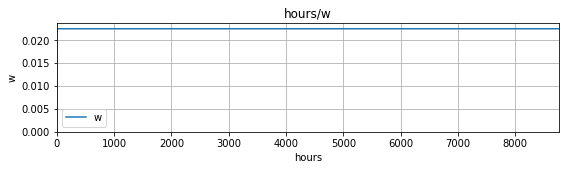

In [6]:
t_toilet_seat_heater_d_t = import_schedule_1_d_t()

x = np.arange(8760)
y = get_E_Elc_toilet_seat_heater_d_t(11.23, 45, t_toilet_seat_heater_d_t)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="w")

plt.grid(True)

plt.title("hours/w")
plt.xlabel("hours")
plt.ylabel("w")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()